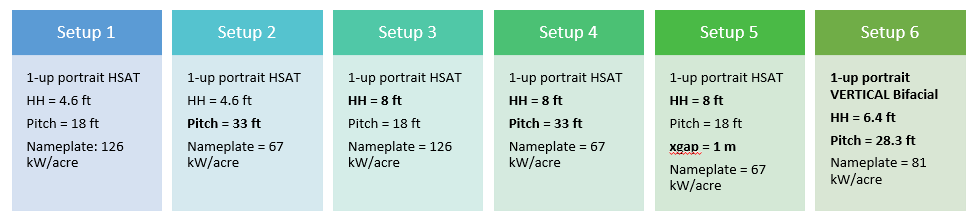

In [ ]:
import os
from pathlib import Path

testfolder = 'TEMP\Setup6' 
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

In [2]:
import bifacial_radiance as br
import numpy as np
import datetime

In [3]:
# Setups

In [4]:
ft2m = 0.3048  # Conversion factor

In [5]:
setup = 6

In [6]:
if setup == 1:
    hub_height = 4.6*ft2m # 
    pitch = 18*ft2m
    xgap = 0.01 # m. Default 
    
if setup == 2:
    hub_height = 4.6*ft2m # 
    pitch = 33*ft2m
    xgap = 0.01 # m. Default 
    
if setup == 3:
    hub_height = 8*ft2m # 
    pitch = 18*ft2m
    xgap = 0.01 # m. Default 
    
if setup == 4:
    hub_height = 8*ft2m # 
    pitch = 33*ft2m
    xgap = 0.01 # m. Default 
    
if setup == 5:
    hub_height = 8*ft2m # 
    pitch = 18*ft2m
    xgap = 1.0 # m


if setup == 6:
    tilt = 90
    hub_height = 6.4*ft2m # 
    pitch = 28.3*ft2m
    xgap = 0.01 # m
    

In [7]:
lat = 30.480671646128137
lon = -83.92997540675283

#tilt = 25
sazm = 90 #

albedo = 0.2 # 'grass'

# Field size. Just going for 'steady state'
nMods = 20
nRows = 7

In [8]:
startdts = [datetime.datetime(2021,4,1,0),
            datetime.datetime(2021,5,1,0),
            datetime.datetime(2021,6,1,0),
            datetime.datetime(2021,7,1,0),
            datetime.datetime(2021,8,1,0),
            datetime.datetime(2021,9,1,0),
            datetime.datetime(2021,4,1,0),]
enddts = [datetime.datetime(2021,5,1,0),
          datetime.datetime(2021,6,1,0),
          datetime.datetime(2021,7,1,0),
          datetime.datetime(2021,8,1,0),
          datetime.datetime(2021,9,1,0),
          datetime.datetime(2021,10,1,0),
          datetime.datetime(2021,10,1,0)]

In [9]:
demo = br.RadianceObj('Setup6', path=testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon) # NJ lat/lon 40.0583° N, 74.4057

path = TEMP
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_FL_Tallahassee.722140_TMY2.epw
 ... OK!


In [10]:
basicmodule = demo.makeModule(name='basicModule', x=1, y=2)
spacedmodule = demo.makeModule(name='spacedModule', x=1, y=2, xgap = 1)


Module Name: basicModule
Module basicModule updated in module.json
Pre-existing .rad file objects\basicModule.rad will be overwritten


Module Name: spacedModule
Module spacedModule updated in module.json
Pre-existing .rad file objects\spacedModule.rad will be overwritten



In [11]:
# SETUP 6 - FIXED TILT

In [12]:
for mmonth in range(0, len(startdts)):
    startdt = startdts[mmonth]
    enddt = enddts[mmonth]
    metdata = demo.readWeatherFile(epwfile, starttime=startdt, endtime=enddt, coerce_year=2021) # read in the EPW weather data from above
    demo.genCumSky(savefile=str(mmonth))
    #demo.gendaylit(4020)  # Use this to simulate only one hour at a time. 

    sceneDict = {'tilt':tilt, 'pitch':pitch, 'hub_height':hub_height, 
                 'azimuth':sazm, 'nMods':nMods, 'nRows':nRows}  
    scene = demo.makeScene(module=spacedmodule, sceneDict=sceneDict) 
    octfile = demo.makeOct(demo.getfilelist())  

    analysis = br.AnalysisObj(octfile, demo.name)
    spacingbetweensamples = 0.05 # m
    sensorsy = int(np.floor(pitch/spacingbetweensamples)+1)
    sensorsx = 1

    # Module first
    frontscan, backscan = analysis.moduleAnalysis(scene, sensorsx = 1, sensorsy=10)
    analysis.analysis(octfile, 'MODULE_Month_'+str(mmonth+4)+'_setup_'+(str(setup)), frontscan, backscan)  # compare the back vs front irradiance  

    groundscan, backscan = analysis.moduleAnalysis(scene, sensorsx = 1, sensorsy=[sensorsy, 1])
    groundscan['zstart'] = 0.05  # setting it 5 cm from the ground.
    groundscan['zinc'] = 0   # no tilt necessary. 
    groundscan['yinc'] = spacingbetweensamples
    groundscan['ystart'] = 0

    analysis.analysis(octfile, 'GROUND_Month_'+str(mmonth+4)+'_setup_'+(str(setup)), groundscan, backscan)  # compare the back vs front irradiance  

filesall = os.listdir('results')

# Cleanup of Ground 'back' files
filestoclean = [e for e in filesall if e.endswith('_Back.csv')]
for cc in range(0, len(filestoclean)):
    filetoclean = filestoclean[cc]
    os.remove(os.path.join('results', filetoclean))

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Loaded  EPWs\metdata_temp.csv
message: Error!  Solar altitude is -11 < -6 degrees and Idh = 52 > 10 W/m^2 on day 91 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -11 < -6 degrees and Idh = 64 > 10 W/m^2 on day 91 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -11 < -6 degrees and Idh = 34 > 10 W/m^2 on day 93 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -11 < -6 degrees and Idh = 38 > 10 W/m^2 on day 93 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -11 < -6 degrees and Idh = 57 > 10 W/m^2 on day 95 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -11 < -

message: Error!  Solar altitude is -14 < -6 degrees and Idh = 20 > 10 W/m^2 on day 152 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -14 < -6 degrees and Idh = 19 > 10 W/m^2 on day 153 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -14 < -6 degrees and Idh = 15 > 10 W/m^2 on day 155 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 18 > 10 W/m^2 on day 156 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 15 > 10 W/m^2 on day 156 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 20 > 10 W/m^2 on day 157 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 19 > 10 W/m^2 on day 160 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 18 > 10 W/m^2 on day 161 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 13 > 10 W/m^2 on day 161 !

Created Setup6.oct
Linescan in process: MODULE_Month_8_setup_6_Row4_Module10_Front
Linescan in process: MODULE_Month_8_setup_6_Row4_Module10_Back
Saved: results\irr_MODULE_Month_8_setup_6_Row4_Module10.csv
Linescan in process: GROUND_Month_8_setup_6_Row4_Module10_Front
Linescan in process: GROUND_Month_8_setup_6_Row4_Module10_Back
Saved: results\irr_GROUND_Month_8_setup_6_Row4_Module10_Front.csv
Saved: results\irr_GROUND_Month_8_setup_6_Row4_Module10_Back.csv
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Loaded  EPWs\metdata_temp.csv
message: Error!  Solar altitude is -10 < -6 degrees and Idh = 36 > 10 W/m^2 on day 243 !Ibn is 0.  Attempting to continue!
Error!  Solar altitu

Created Setup6.oct
Linescan in process: MODULE_Month_10_setup_6_Row4_Module10_Front
Linescan in process: MODULE_Month_10_setup_6_Row4_Module10_Back
Saved: results\irr_MODULE_Month_10_setup_6_Row4_Module10.csv
Linescan in process: GROUND_Month_10_setup_6_Row4_Module10_Front
Linescan in process: GROUND_Month_10_setup_6_Row4_Module10_Back
Saved: results\irr_GROUND_Month_10_setup_6_Row4_Module10_Front.csv
Saved: results\irr_GROUND_Month_10_setup_6_Row4_Module10_Back.csv


In [14]:
GHIs = []
for mmonth in range(0, len(startdts)):
    startdt = startdts[mmonth]
    enddt = enddts[mmonth]
    metdata = demo.readWeatherFile(epwfile, starttime=startdt, endtime=enddt, coerce_year=2021)
    GHIs.append(metdata.dni.sum())

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun posit

In [16]:
GHIs

[150859, 164434, 132429, 116474, 116520, 116796, 797512]

## 2. Plot Bifacial Gain Results

In [17]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
font = {#'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

#sns.set(rc={'figure.figsize':(5.7,4.27)})

In [ ]:
testfolder

In [ ]:
import calendar

In [ ]:
hub_heights = [4.3, 3.5, 2.5, 1.5]
results_BGG=[]
results_GFront=[]
results_GRear=[]
results_GGround=[]
results_coordY=[]
setups = []
months = []
results_GHI = []
for ii in range(0, len(clearance_heights)):
    for jj in range(0, len(startdts)):
        
        if jj == (len(startdts)-1):
            months.append('Season')
        else:
            months.append(calendar.month_abbr[jj+4])
        setups.append(ii+1)
        # irr_GROUND_Month_6_setup_1_Row4_Module10_Back.csv
        fileground= os.path.join('results', f'irr_GROUND_Month_'+str(jj+4)+'_setup_'+str(ii+1)+'_Row4_Module10_Front.csv')
        filepv= os.path.join('results', f'irr_MODULE_Month_'+str(jj+4)+'_setup_'+str(ii+1)+'_Row4_Module10.csv')
        resultsGround = load.read1Result(fileground)
        resultsPV = load.read1Result(filepv)
        #  resultsDF = load.cleanResult(resultsDF).dropna() # I checked them they are good because even number of sensors
        results_GGround.append(list(resultsGround['Wm2Front']))
        results_coordY.append(list(resultsGround['y']))
        results_GFront.append(list(resultsPV['Wm2Front']))
        results_GRear.append(list(resultsPV['Wm2Back']))
        results_BGG.append(resultsPV['Wm2Back'].sum()*100/resultsPV['Wm2Front'].sum())
        results_GHI.append(GHIs[jj])


In [ ]:
df = pd.DataFrame(list(zip(setups, months, results_GHI, results_coordY, results_GGround,
                          results_GFront, results_GRear, results_BGG)),
               columns =['Setup', 'Month', 'GHI', 'GroundCoordY', 'Gground', 'Gfront', 'Grear', 'BGG'])

In [ ]:
# Example of selectiong one setup one month
df[(df['Setup']==1) & (df['Month']=='Apr')]

In [ ]:
foo = df[(df['Setup']==1) & (df['Month']=='Apr')]
foo1 = df[(df['Setup']==1) & (df['Month']=='May')]
foo2 = df[(df['Setup']==1) & (df['Month']=='Jun')]

plt.plot(foo['GroundCoordY'][0], foo['Gground'].iloc[0], label='Apr')
plt.plot(foo['GroundCoordY'][0], foo1['Gground'].iloc[0], label='May')
plt.plot(foo['GroundCoordY'][0], foo2['Gground'].iloc[0], label='June')
plt.title('Setup 1')
plt.xlabel('Row to Row distance')
plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
plt.legend()

In [ ]:
foo = df[(df['Setup']==1) & (df['Month']=='Apr')]
foo1 = df[(df['Setup']==1) & (df['Month']=='May')]
foo2 = df[(df['Setup']==1) & (df['Month']=='Jun')]

plt.plot(foo['GroundCoordY'][0], foo['Gground'].iloc[0]/foo['GHI'].iloc[0], label='Apr')
plt.plot(foo['GroundCoordY'][0], foo1['Gground'].iloc[0]/foo1['GHI'].iloc[0], label='May')
plt.plot(foo['GroundCoordY'][0], foo2['Gground'].iloc[0]/foo2['GHI'].iloc[0], label='June')
plt.title('Setup 1')
plt.xlabel('Row to Row distance')
plt.ylabel('Irradiance Factor')
plt.legend();

In [ ]:
foo = df[(df['Setup']==1) & (df['Month']=='May')]
foo1 = df[(df['Setup']==2) & (df['Month']=='May')]
foo2 = df[(df['Setup']==3) & (df['Month']=='May')]

plt.plot(foo['GroundCoordY'].iloc[0], foo['Gground'].iloc[0], label='Setup 1')
plt.plot(foo1['GroundCoordY'].iloc[0], foo1['Gground'].iloc[0], label='Setup 2')
plt.plot(foo2['GroundCoordY'].iloc[0], foo2['Gground'].iloc[0], label='Setup 3')
plt.title('May')
plt.xlabel('Row to Row distance')
plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
plt.legend();

In [ ]:
foo = df[(df['Setup']==1) & (df['Month']=='Jun')]
foo1 = df[(df['Setup']==2) & (df['Month']=='Jun')]
foo2 = df[(df['Setup']==3) & (df['Month']=='Jun')]

plt.plot(foo['GroundCoordY'].iloc[0], foo['Gground'].iloc[0]/foo['GHI'].iloc[0], label='Setup 1')
plt.plot(foo1['GroundCoordY'].iloc[0], foo1['Gground'].iloc[0]/foo1['GHI'].iloc[0], label='Setup 2')
plt.plot(foo2['GroundCoordY'].iloc[0], foo2['Gground'].iloc[0]/foo2['GHI'].iloc[0], label='Setup 3')
plt.title('June')
plt.xlabel('Row to Row distance')
plt.ylabel('Irradiance Factor')
plt.legend();

## 3. Testbed Calculations

In [ ]:
xps = []
for cw in cws:
    xps.append(np.round(cw*np.cos(np.radians(tilt))/2,2))
xps

In [ ]:
# SETUP Table
# Setups, by month, all irradiance on ground between rows

foo0 = df[(df['Setup']==1) & (df['Month']=='Apr')]
foo1 = df[(df['Setup']==1) & (df['Month']=='May')]
foo2 = df[(df['Setup']==1) & (df['Month']=='Jun')]
foo3 = df[(df['Setup']==1) & (df['Month']=='Jul')]
foo4 = df[(df['Setup']==1) & (df['Month']=='Aug')]
foo5 = df[(df['Setup']==1) & (df['Month']=='Sep')]
foo6 = df[(df['Setup']==1) & (df['Month']=='Season')]


setup1 = pd.DataFrame(list(zip(foo0['Gground'].iloc[0],
                      foo1['Gground'].iloc[0],
                      foo2['Gground'].iloc[0],
                      foo3['Gground'].iloc[0],
                      foo4['Gground'].iloc[0],
                      foo5['Gground'].iloc[0],
                      foo6['Gground'].iloc[0],
                     )), columns=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Season'],
                     index=foo0['GroundCoordY'].iloc[0])

foo0 = df[(df['Setup']==2) & (df['Month']=='Apr')]
foo1 = df[(df['Setup']==2) & (df['Month']=='May')]
foo2 = df[(df['Setup']==2) & (df['Month']=='Jun')]
foo3 = df[(df['Setup']==2) & (df['Month']=='Jul')]
foo4 = df[(df['Setup']==2) & (df['Month']=='Aug')]
foo5 = df[(df['Setup']==2) & (df['Month']=='Sep')]
foo6 = df[(df['Setup']==2) & (df['Month']=='Season')]


setup2 = pd.DataFrame(list(zip(foo0['Gground'].iloc[0],
                      foo1['Gground'].iloc[0],
                      foo2['Gground'].iloc[0],
                      foo3['Gground'].iloc[0],
                      foo4['Gground'].iloc[0],
                      foo5['Gground'].iloc[0],
                      foo6['Gground'].iloc[0],
                     )), columns=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Season'],
                     index=foo0['GroundCoordY'].iloc[0])

foo0 = df[(df['Setup']==3) & (df['Month']=='Apr')]
foo1 = df[(df['Setup']==3) & (df['Month']=='May')]
foo2 = df[(df['Setup']==3) & (df['Month']=='Jun')]
foo3 = df[(df['Setup']==3) & (df['Month']=='Jul')]
foo4 = df[(df['Setup']==3) & (df['Month']=='Aug')]
foo5 = df[(df['Setup']==3) & (df['Month']=='Sep')]
foo6 = df[(df['Setup']==3) & (df['Month']=='Season')]


setup3 = pd.DataFrame(list(zip(foo0['Gground'].iloc[0],
                      foo1['Gground'].iloc[0],
                      foo2['Gground'].iloc[0],
                      foo3['Gground'].iloc[0],
                      foo4['Gground'].iloc[0],
                      foo5['Gground'].iloc[0],
                      foo6['Gground'].iloc[0],
                     )), columns=['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Season'],
                     index=foo0['GroundCoordY'].iloc[0])


In [ ]:
# Setup 1, by month, all irradiance on ground between rows
setup1

In [ ]:
# edges is the irradiance undreneath the panels of the encompasing rows
# centers is where there is no panel
center1 = setup1[(setup1.index > xps[0]) & (setup1.index <= (setup1.index[-1] - xps[0]))]
edges1 = setup1[~(setup1.index > xps[0]) & (setup1.index <= (setup1.index[-1] - xps[0]))]
center2 = setup2[(setup2.index > xps[1]) & (setup2.index <= (setup2.index[-1] - xps[1]))]
edges2 = setup2[~(setup2.index > xps[1]) & (setup2.index <= (setup2.index[-1] - xps[1]))]
center3 = setup3[(setup3.index > xps[2]) & (setup3.index <= (setup3.index[-1] - xps[2]))]
edges3 = setup3[~(setup3.index > xps[2]) & (setup3.index <= (setup3.index[-1] - xps[2]))]

edges1

In [ ]:
# Calculating the 3 testbeds. equidistant
dist1 = (center1.index[-1]-center1.index[0])/3
dist2 = (center2.index[-1]-center2.index[0])/3
dist3 = (center3.index[-1]-center3.index[0])/3

setup1testbedA = center1[center1.index <= (center1.index[0] + dist1)]
setup1testbedB = center1[(center1.index > (center1.index[0] + dist1)) & (center1.index <= (center1.index[0] + dist1*2))]
setup1testbedC = center1[center1.index > (center1.index[0] + dist1*2)]

setup2testbedA = center2[center2.index <= (center2.index[0] + dist2)]
setup2testbedB = center2[(center2.index > (center2.index[0] + dist2)) & (center2.index <= (center2.index[0] + dist2*2))]
setup2testbedC = center2[center2.index > (center2.index[0] + dist2*2)]

setup3testbedA = center3[center3.index <= (center3.index[0] + dist3)]
setup3testbedB = center3[(center3.index > (center3.index[0] + dist3)) & (center3.index <= (center3.index[0] + dist3*2))]
setup3testbedC = center3[center3.index > (center3.index[0] + dist3*2)]


In [ ]:
IFtable = [np.round(list(setup1testbedA.mean()/GHIs),2),
np.round(list(setup1testbedB.mean()/GHIs),2),
np.round(list(setup1testbedC.mean()/GHIs),2),
np.round(list(setup2testbedA.mean()/GHIs),2),
np.round(list(setup2testbedB.mean()/GHIs),2),
np.round(list(setup2testbedC.mean()/GHIs),2),
np.round(list(setup3testbedA.mean()/GHIs),2),
np.round(list(setup3testbedB.mean()/GHIs),2),
np.round(list(setup3testbedC.mean()/GHIs),2),
np.round(list(edges1.mean()/GHIs),2),
np.round(list(edges2.mean()/GHIs),2),
np.round(list(edges3.mean()/GHIs),2),
GHIs]

IFresults = pd.DataFrame(IFtable, index = ['Setup 1 TB A', 'Setup 1 TB B', 'Setup 1 TB C',
                                             'Setup 2 TB A', 'Setup 2 TB B', 'Setup 2 TB C',
                                             'Setup 3 TB A', 'Setup 3 TB B', 'Setup 3 TB C',
                                          'Setup 1 Under Panel', 'Setup 2 Under Panel', 'Setup 3 Under Panel', 'GHIs [Wh/m2]'],
                        columns = setup1testbedB.columns)
IFresults

In [ ]:
Meanstable = [np.round(list(setup1testbedA.mean()),2),
np.round(list(setup1testbedB.mean()),2),
np.round(list(setup1testbedC.mean()),2),
np.round(list(setup2testbedA.mean()),2),
np.round(list(setup2testbedB.mean()),2),
np.round(list(setup2testbedC.mean()),2),
np.round(list(setup3testbedA.mean()),2),
np.round(list(setup3testbedB.mean()),2),
np.round(list(setup3testbedC.mean()),2),
np.round(list(edges1.mean()),2),
np.round(list(edges2.mean()),2),
np.round(list(edges3.mean()),2),
GHIs]

Meansresults = pd.DataFrame(Meanstable, index = ['Setup 1 TB A [Wh/m2]', 'Setup 1 TB B [Wh/m2]', 'Setup 1 TB C [Wh/m2]',
                                             'Setup 2 TB A [Wh/m2]', 'Setup 2 TB B [Wh/m2]', 'Setup 2 TB C [Wh/m2]',
                                             'Setup 3 TB A [Wh/m2]', 'Setup 3 TB B [Wh/m2]', 'Setup 3 TB C [Wh/m2]',
                                          'Setup 1 Under Panel [Wh/m2]', 'Setup 2 Under Panel [Wh/m2]', 'Setup 3 Under Panel [Wh/m2]', 'GHIs [Wh/m2]'],
                        columns = setup1testbedB.columns)
Meansresults

In [ ]:
# Describe dataframes for each testbed/setup
A1 = np.round(setup1testbedA.describe(),2)
B1 = np.round(setup1testbedB.describe(),2)
C1 = np.round(setup1testbedC.describe(),2)
A2 = np.round(setup2testbedA.describe(),2)
B2 = np.round(setup2testbedB.describe(),2)
C2 = np.round(setup2testbedC.describe(),2)
A3 = np.round(setup3testbedA.describe(),2)
B3 = np.round(setup3testbedB.describe(),2)
C3 = np.round(setup3testbedC.describe(),2)
E1 = np.round(edges1.describe())
E2 = np.round(edges2.describe())
E3 = np.round(edges3.describe())


In [ ]:
with pd.ExcelWriter("Results_13Feb23.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    IFresults.to_excel(writer, sheet_name="Irradiance Factors", index=True)
    Meansresults.to_excel(writer, sheet_name="Mean Irradiances", index=True)
    A1.to_excel(writer, sheet_name="Setup 1 TB C", index=True)
    B1.to_excel(writer, sheet_name="Setup 1 TB B", index=True)
    C1.to_excel(writer, sheet_name="Setup 1 TB C", index=True)    
    E1.to_excel(writer, sheet_name="Setup 1 UnderPanel", index=True)
    A2.to_excel(writer, sheet_name="Setup 2 TB C", index=True)
    B2.to_excel(writer, sheet_name="Setup 2 TB C", index=True)
    C2.to_excel(writer, sheet_name="Setup 2 TB C", index=True)
    E2.to_excel(writer, sheet_name="Setup 2 UnderPanel", index=True)
    A3.to_excel(writer, sheet_name="Setup 3 TB C", index=True)
    B3.to_excel(writer, sheet_name="Setup 3 TB C", index=True)
    C3.to_excel(writer, sheet_name="Setup 3 TB C", index=True)
    E3.to_excel(writer, sheet_name="Setup 1 UnderPanel", index=True)


In [ ]:
# EXPANDED Describe dataframes for each testbed/setup

In [ ]:
np.round(setup1testbedA.describe(),2)

In [ ]:
np.round(setup1testbedB.describe())

In [ ]:
np.round(setup1testbedC.describe())

In [ ]:
np.round(setup2testbedA.describe())

In [ ]:
np.round(setup2testbedB.describe())

In [ ]:
np.round(setup2testbedC.describe())

In [ ]:
np.round(setup3testbedA.describe())

In [ ]:
np.round(setup3testbedB.describe())

In [ ]:
np.round(setup3testbedC.describe())

In [ ]:
np.round(edges1.describe())

In [ ]:
np.round(edges2.describe())

In [ ]:
np.round(edges3.describe())